# Project Objective: Trend Analysis in Credit Card Origination

The first part of this project aims to perform a comprehensive trend analysis of the credit card origination market. Specifically, it examines the number and volume of credit cards originated over time, offering insights into consumer demand and financial institutions' lending behaviors. By analyzing these trends, the project seeks to understand the market dynamics, including significant periods of growth or decline, and potential external factors influencing these trends. This analysis is particularly relevant for financial companies like Affirm, where understanding consumer credit behaviors and market trends is essential for optimizing debt funding strategies and predicting loan performance.

# Project Summary

This project analyzes trends in the number and volume of credit cards originated over time to gain insights into consumer borrowing behaviors and the broader credit card market. By understanding these trends, we aim to assess potential implications for Affirm’s debt funding strategies, particularly how changes in consumer credit demand might influence the structuring and pricing of debt funding deals. This analysis is crucial for optimizing funding strategies and predicting the performance of Affirm's consumer loans, aligning with the responsibilities of the Quantitative Markets team at Affirm.


## Data Exploration
The first step is to load the data with Pandas

In [1]:
import pandas as pd

# Defining the path to the files

file_path = r'C:\Users\berli\Desktop\Projects for Portfolio Data Analyst\3-SmartCredit Trends Analysis\\'

# Load the datasets
lending_number_cards_originated = pd.read_csv(file_path + 'lending_number_cards_originated.csv')
lending_volume_cards_originated = pd.read_csv(file_path + 'lending_volume_cards_originated.csv')
yoy_data_all_CRC = pd.read_csv(file_path + 'yoy_data_all_CRC.csv')
Geographic_data_CRC = pd.read_csv(file_path + 'Geographic_data_CRC.csv')

#Displaying the first raws of each dataset
print('Lending Number Cards Originated')
print(lending_number_cards_originated.head())

print('\nLending Volume Cards Originated')
print(lending_volume_cards_originated.head())

print('\nyear-over-year changes')
print(yoy_data_all_CRC.head())

print('\nGeographic changes')
print(Geographic_data_CRC.head())

Lending Number Cards Originated
   month     date           num  num_unadj
0     60  2005-01  6.481282e+06    5694944
1     61  2005-02  6.615296e+06    5622580
2     62  2005-03  6.611764e+06    6635412
3     63  2005-04  6.435489e+06    6147368
4     64  2005-05  6.379248e+06    6261976

Lending Volume Cards Originated
   month     date           vol    vol_unadj
0     60  2005-01  3.688235e+10  31966116768
1     61  2005-02  3.735492e+10  32164658096
2     62  2005-03  3.780124e+10  38639133120
3     63  2005-04  3.740718e+10  36942943824
4     64  2005-05  3.757479e+10  37159317075

year-over-year changes
   month     date   yoy_num   yoy_vol
0     72  2006-01  0.066307  0.013284
1     73  2006-02  0.182244  0.186565
2     74  2006-03  0.049505 -0.047434
3     75  2006-04  0.039527 -0.061874
4     76  2006-05  0.090489 -0.009747

Geographic changes
   fips_code state_abbr     value
0          1         AL  0.090446
1          2         AK  0.069472
2          4         AZ  0.080640

### After loading the Data we will inspect Data Quality by:
- Understanding Data Structure: Reviewing column names and data types to  understand the dataset structure.
- Checking the datatypes
- Summary Statistcis: Generating summary statistics to get an overview of the data.

### Exploring the Data

In [2]:
#Checking the datatypes for each dataset
print('Datatypes for Lending Number Cards Originated:\n', lending_number_cards_originated.dtypes)
print('\nDatatypes for Lending Volume Cards Originated:\n', lending_volume_cards_originated.dtypes)
print('\nDatatypes for year-over-year:\n', yoy_data_all_CRC.dtypes)
print('\nDatatypes for Geographic changes:\n', Geographic_data_CRC.dtypes)

Datatypes for Lending Number Cards Originated:
 month          int64
date          object
num          float64
num_unadj      int64
dtype: object

Datatypes for Lending Volume Cards Originated:
 month          int64
date          object
vol          float64
vol_unadj      int64
dtype: object

Datatypes for year-over-year:
 month        int64
date        object
yoy_num    float64
yoy_vol    float64
dtype: object

Datatypes for Geographic changes:
 fips_code       int64
state_abbr     object
value         float64
dtype: object


In [7]:
#Summary Statistcis before checking if there are missing values
print('Summary Stats for Lending Number Cards Originated:\n' + str(lending_number_cards_originated.describe()))
print('\nSummary Stats for Lending Volume Cards Originated:\n' + str(lending_volume_cards_originated.describe()))
print('\nSummary Stats for year-over-year changes:\n' + str(yoy_data_all_CRC.describe()))
print('\nSummary Stats for Geographic changes:\n' + str(Geographic_data_CRC.describe()))

Summary Stats for Lending Number Cards Originated:
            month           num     num_unadj
count  172.000000  1.720000e+02  1.720000e+02
mean   145.500000  5.393096e+06  5.380699e+06
std     49.796252  1.175928e+06  1.218204e+06
min     60.000000  3.307686e+06  2.843892e+06
25%    102.750000  4.383488e+06  4.369581e+06
50%    145.500000  5.483961e+06  5.406898e+06
75%    188.250000  6.338291e+06  6.205012e+06
max    231.000000  8.209921e+06  8.078244e+06

Summary Stats for Lending Volume Cards Originated:
            month           vol     vol_unadj
count  172.000000  1.720000e+02  1.720000e+02
mean   145.500000  2.967899e+10  2.963002e+10
std     49.796252  7.773349e+09  7.899583e+09
min     60.000000  1.510426e+10  1.348880e+10
25%    102.750000  2.241365e+10  2.268884e+10
50%    145.500000  3.237800e+10  3.151846e+10
75%    188.250000  3.580150e+10  3.577935e+10
max    231.000000  4.444884e+10  4.575501e+10

Summary Stats for year-over-year changes:
           month     yoy_n

### Checking for missing values

In [3]:
#Checking for missing values and Understanding Data Structure
print('Missing values in Lending Number Cards Originated:\n' + str(lending_number_cards_originated.isnull().sum()))
print('\nMissing values in Lending Volume Cards Originated:\n' + str(lending_volume_cards_originated.isnull().sum()))
print('\nMissing values in year-over-year changes:\n' + str(yoy_data_all_CRC.isnull().sum()))
print('\nMissing values in Geographic changes:\n' + str( Geographic_data_CRC.isnull().sum()))

Missing values in Lending Number Cards Originated:
month        0
date         0
num          0
num_unadj    0
dtype: int64

Missing values in Lending Volume Cards Originated:
month        0
date         0
vol          0
vol_unadj    0
dtype: int64

Missing values in year-over-year changes:
month      0
date       0
yoy_num    4
yoy_vol    4
dtype: int64

Missing values in Geographic changes:
fips_code     0
state_abbr    0
value         0
dtype: int64


### Cleaning the Data
After checking for the existance of missing values we can observe that in the data for year-over-year there are 4 values missing in the columns yoy_num and yoy_vol. We will calculate the percentage that that missing data represents for the year-over-year dataframe to make an informed decision on how to handle it.

For the cleaning data stage we will follow the steps bellow:
- Calculate the percentage of missing data
- Handle the missing values 
- Compare the Summary Stats before and after handling the missing values
- Convert date columns from object to a datetime format 

In [4]:
#Calculating the percentage of missing data for columns yoy_num and yoy_vol in year-over-year
missing_percentage_yoy_num = yoy_data_all_CRC['yoy_num'].isnull().sum()/len(yoy_data_all_CRC)*100
missing_percentage_yoy_vol = yoy_data_all_CRC['yoy_vol'].isnull().sum()/len(yoy_data_all_CRC)*100

print(f'Percentage of missing data in yoy_num: {missing_percentage_yoy_num: .2f}%')
print(f'Percentage of missing data in yoy_vol: {missing_percentage_yoy_vol: .2f}%')

Percentage of missing data in yoy_num:  2.44%
Percentage of missing data in yoy_vol:  2.44%


After calculating the percentage it shows that the missing data represents the 2.44% of the whole dataset, which is really small. However, to go closer on the impact of this missing data and do the best informed decision, we will calcuate the Summary Statistics in both different ways; 1-by ignoring the missing values and 2-by imputing the missing values with the mean to compare the both summary statistics (Mean imputation was chosen for its simplicity and effectiveness in handling moderate amounts of missing data).

In [5]:
#Checking the fillna process
yoy_num_mean = yoy_data_all_CRC['yoy_num'].mean()
yoy_vol_mean = yoy_data_all_CRC['yoy_vol'].mean()

yoy_data_all_CRC_imputed = yoy_data_all_CRC.fillna({
    'yoy_num' : yoy_num_mean,
    'yoy_vol' : yoy_vol_mean
})

print('Missing values after imputation for the year-over-year dataset:\n', yoy_data_all_CRC_imputed.isnull().sum())

Missing values after imputation for the year-over-year dataset:
 month      0
date       0
yoy_num    0
yoy_vol    0
dtype: int64


In [6]:
#Summary statistics by ignoring the missing values
print('\nSummary Stats for year-over-year changes before imputation:\n' + str(yoy_data_all_CRC.describe()))

#Summary statistics after imputing the missing values with the mean
print('\nSummary Stats for year-over-year changes after imputation:\n' + str(yoy_data_all_CRC_imputed.describe()))



Summary Stats for year-over-year changes before imputation:
           month     yoy_num     yoy_vol
count  164.00000  160.000000  160.000000
mean   153.50000    0.004469    0.015336
std     47.48684    0.153671    0.186864
min     72.00000   -0.503061   -0.632506
25%    112.75000   -0.047619   -0.049220
50%    153.50000    0.042184    0.043162
75%    194.25000    0.103959    0.147418
max    235.00000    0.245319    0.309888

Summary Stats for year-over-year changes after imputation:
           month     yoy_num     yoy_vol
count  164.00000  164.000000  164.000000
mean   153.50000    0.004469    0.015336
std     47.48684    0.151774    0.184557
min     72.00000   -0.503061   -0.632506
25%    112.75000   -0.045674   -0.047864
50%    153.50000    0.038975    0.039287
75%    194.25000    0.099907    0.140829
max    235.00000    0.245319    0.309888


Let's analyze the differences before and after imputing the missing values:

### 1- Standard Deviation (std):
Before Imputation: std for yoy_num is 0.153671, and for yoy_vol, it is 0.186864.

After Imputation: std for yoy_num decreased slightly to 0.151774, and for yoy_vol, it decreased to 0.184557.


### Interpretation:
A decrease in the std suggest that the imputed values are closer to the central tnedency of the data, reducing the variability slightly. This is expected because the mean imputation tends to pull values towards the center.

### 2- Percentiles (25%, 50%, 75%):
The changes in the percentiles (especially the 50% or median) also suggest that the distribution has shifted slightly. Since the mean was used for imputation, the imputed values are less likely to be outliers, which smooths out the distribution.

### Interpretation:
The fact that these percentiles shifted, but not drastically, suggests that the missing data was not radically different from the existing data. However, it’s still a sign that the imputation had some impact on the distribution.

### Final Decision:
As this is a descriptive analysis, where we are primarily looking at trends and patterns, these changes might be less significant, therefore, we will proceed with the imputed data as the mean imputation didn't drastically alter the data.


### Converting date from object to datetime

In [6]:
# Merging dataframes that share the same column date
#list of dataframes (dfs)
dfs = [lending_number_cards_originated, lending_volume_cards_originated, yoy_data_all_CRC]

for df in dfs:
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        
#Verifying the conversion
for df in dfs:
    print(df.dtypes, '\n')

month                 int64
date         datetime64[ns]
num                 float64
num_unadj             int64
dtype: object 

month                 int64
date         datetime64[ns]
vol                 float64
vol_unadj             int64
dtype: object 

month               int64
date       datetime64[ns]
yoy_num           float64
yoy_vol           float64
dtype: object 



# Analysis

## Trend Analysis in Credit Card Origination:
### Objective: 
- Identify trends in the number and volume of credit cards originated over time:
Understanding these trends can help organizations gauge consumer demand for credit over time, which can inform their decision-making in structuring and pricing debt funding deals.

## Approach:
- We will perform a time-series analysis on both Lending Number Cards Originated and Lending Volume Cards Originated.
- Highlight periods of significant growth or decline.
- Examine seasonality, if any, and discuss potential external factors influencing these trends.

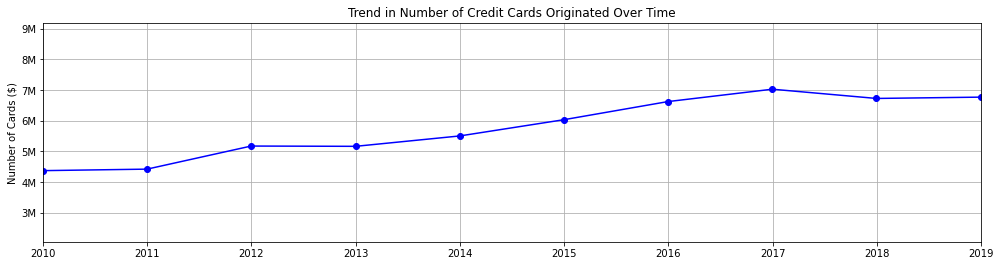

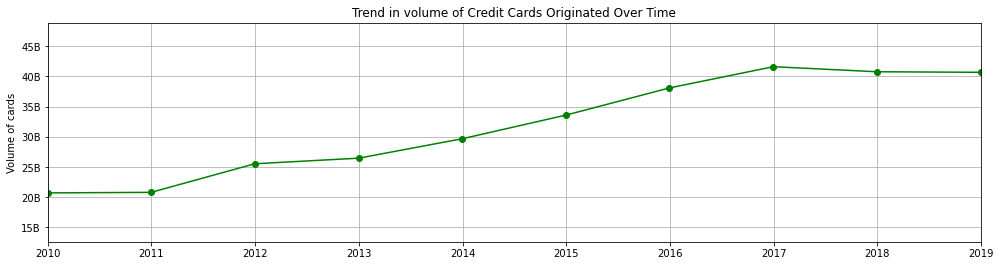

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Formatter function for millions
def millions(x, pos):
    return '%1.0fM' % (x * 1e-7)

# Formatter function for billions
def billions(x, pos):
    return '%1.0fB' % (x * 1e-10)


# Resampling Data by Year
num_by_year = lending_number_cards_originated.resample('Y', on='date')['num'].sum()
vol_by_year = lending_volume_cards_originated.resample('Y', on='date')['vol'].sum()

#Visualizing the trend in both the number and volume of credit cards originated
plt.figure(figsize=(14,7))


#Defining range of time
start_date = pd.Timestamp('2010')
end_date = pd.Timestamp('2019')


#Visualzation for the trend in number of credit cards originated
plt.subplot(2,1,1)
plt.plot(num_by_year.index, num_by_year.values, marker='o', color='b', linestyle='-')
plt.title('Trend in Number of Credit Cards Originated Over Time')
plt.xlim([start_date, end_date])
plt.ylabel('Number of Cards ($)')

plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions))

plt.tight_layout()
plt.show()

#Visualzation for the trend in volume of credit cards originated
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.plot(vol_by_year.index, vol_by_year.values, marker='o', color='g', linestyle='-')
plt.title('Trend in volume of Credit Cards Originated Over Time')
plt.xlim([start_date, end_date])
plt.ylabel('Volume of cards')

plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(billions))
plt.tight_layout()
plt.show()

# Analysis 

## 1. Number of Credit Cards Originated Over Time (Top Graph)
Trend Observation: The number of credit cards originated has shown a general upward trend from 2010 to 2017, with some minor fluctuations. The increase is steady, indicating a growing demand or a broader issuance of credit cards over the years.
Significant Changes: Notable growth occurred between 2011 and 2012, followed by a steady increase. However, after peaking in 2017, there is a slight decline.

Seasonality and External Factors: The smooth trend suggests minimal seasonal variation, though the peak in 2016 followed by a decline might hint at external factors like economic conditions, regulatory changes, or shifts in consumer behavior affecting credit card origination.

## 2. Volume of Credit Cards Originated Over Time (Bottom Graph)
Trend Observation: The volume of credit cards originated exhibits a more pronounced upward trend compared to the number of cards. This suggests not only an increase in the number of cards issued but also a significant rise in the credit limits or spending associated with these cards.

Significant Changes: The growth is quite steady from 2010 to 2017, with a noticeable increase around 2011 to 2013, and a continued rise until a peak in 2017.

Seasonality and External Factors: There is a clear upward trajectory, indicating a consistent increase in credit demand or supply. The peak in 2017 may correlate with economic factors such as increased consumer spending or more aggressive lending practices by financial institutions.


## Conclusion:
The trends in both the number and volume of credit cards originated suggest a growing credit card market over the period analyzed. The volume growing faster than the number of cards indicates that financial institutions may have been increasingly willing to extend higher credit limits, reflecting confidence in consumers' ability to repay or a competitive market environment. However, the slight decline in both metrics after 2017 suggests caution, possibly due to economic uncertainties or changes in credit policies.

# Analysis of Year-over-Year Growth Rates

## Handling NaN Values in Year-over-Year Growth Calculation

In this analysis, we are calculating the Year-over-Year (YoY) growth rates for the number and volume of credit cards originated. This calculation is critical for understanding trends over time. However, during the analysis, we encountered NaN (Not a Number) values, which need to be addressed to ensure accurate results.

### Exploratory Data Analysis and Initial Cleaning

Before calculating YoY growth rates, the data was cleaned through the following steps:

- Checked for missing values in the original datasets.
- Resampled the data by year to aggregate the number and volume of credit cards originated.
- Initial cleaning confirmed that there were no missing values in the resampled data.

The next step was to calculate the percentage change to determine YoY growth rates.

### Calculation of YoY Growth Rates

The Year-over-Year (YoY) growth rates were calculated using the percentage change (`pct_change()`) method. This method computes the percentage change from the previous value, which is essential for identifying trends over time.

However, the `pct_change()` method introduces NaN values:

- The first value in the series is always NaN because there is no prior data point for comparison.


In [14]:
# Calculate YoY Growth Rates
yoy_growth_num = num_by_year.pct_change() * 100
yoy_growth_vol = vol_by_year.pct_change() * 100

# Check for NaN values in YoY growth
print('Checking for NaN values in yoy_growth_num:', yoy_growth_num.isnull().sum())
print('Checking for NaN values in yoy_growth_vol:', yoy_growth_vol.isnull().sum())



Checking for NaN values in yoy_growth_num: 1
Checking for NaN values in yoy_growth_vol: 1


### Handling NaN Values

To address the NaN values in the YoY growth rates, the following approaches were considered:

1. **Dropping NaN Values**: Removed the NaN values using `.dropna()` to ensure that only valid data is used for further analysis.

    ```python
    yoy_growth_num = yoy_growth_num.dropna()
    yoy_growth_vol = yoy_growth_vol.dropna()
    ```

2. **Filling NaN Values**: Alternatively, NaN values could be filled using methods like forward fill (`fillna(method='ffill')`), but this approach was not used in this analysis.

    ```python
    yoy_growth_num = yoy_growth_num.fillna(method='ffill')
    yoy_growth_vol = yoy_growth_vol.fillna(method='ffill')
    ```

For this project, the NaN values were dropped to maintain the integrity of the analysis.


In [23]:
yoy_growth_num = yoy_growth_num.dropna()
yoy_growth_vol = yoy_growth_vol.dropna()
    
# Check for NaN values in YoY growth after handling the missing values
print('Checking for NaN values in yoy_growth_num:', yoy_growth_num.isnull().sum())
print('Checking for NaN values in yoy_growth_vol:', yoy_growth_vol.isnull().sum())


Checking for NaN values in yoy_growth_num: 0
Checking for NaN values in yoy_growth_vol: 0


### Impact of Handling NaN Values

By dropping the NaN values, we ensure that the linear regression models used for trend analysis are fitted on complete data. This approach allows us to accurately assess the YoY growth trends without distortion caused by missing data.

Moving forward, the clean data will be used for modeling and visualizations.


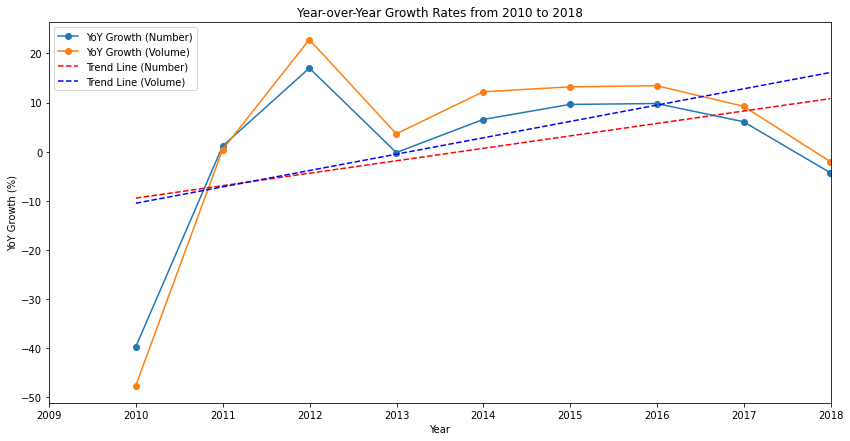

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Filter the YoY growth data to include only the years from 2010 to 2018
yoy_growth_num_filtered = yoy_growth_num[(yoy_growth_num.index >= start_date) & (yoy_growth_num.index <= end_date)]
yoy_growth_vol_filtered = yoy_growth_vol[(yoy_growth_vol.index >= start_date) & (yoy_growth_vol.index <= end_date)]

# Fit the linear regression model for both number and volume
years_num = np.array(range(len(yoy_growth_num_filtered.index))).reshape(-1, 1)
years_vol = np.array(range(len(yoy_growth_vol_filtered.index))).reshape(-1, 1)

model_num = LinearRegression().fit(years_num, yoy_growth_num_filtered.values)
model_vol = LinearRegression().fit(years_vol, yoy_growth_vol_filtered.values)

# Predict the trend line
trend_line_num = model_num.predict(years_num)
trend_line_vol = model_vol.predict(years_vol)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot YoY Growth (Number)
plt.plot(yoy_growth_num_filtered.index, yoy_growth_num_filtered.values, label='YoY Growth (Number)', marker='o')

# Plot YoY Growth (Volume)
plt.plot(yoy_growth_vol_filtered.index, yoy_growth_vol_filtered.values, label='YoY Growth (Volume)', marker='o')

# Plot trend lines
plt.plot(yoy_growth_num_filtered.index, trend_line_num, color='red', linestyle='--', label='Trend Line (Number)')
plt.plot(yoy_growth_vol_filtered.index, trend_line_vol, color='blue', linestyle='--', label='Trend Line (Volume)')

# Set x-axis limits to show the range from 2010 to 2018
plt.xlim(start_date, end_date)

# Adding titles and labels
plt.xlabel('Year')
plt.ylabel('YoY Growth (%)')
plt.title('Year-over-Year Growth Rates from 2010 to 2018')

# Adding a legend
plt.legend()

plt.show()

